# Effects of Trip Characteristics on Trip Duration

## Investigation Overview

In this investigation, I wanted to look at the characteristics of trips that could be used to predict their duration. The main focus was on the start time, member gender, user type and bike share for trip.

## Dataset Overview

The data set contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for approximately 183,400 trips within the month of February 2019. 8460 data points were removed from the analysis due to inconsistencies or missing information.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [40]:
# load in the dataset into a pandas dataframe, print statistics
trips = pd.read_csv("201902-fordgobike-tripdata.csv")

### Data wrangling, removing diamonds with inconsistent or missing data

In [41]:
# drop nulls
trips.dropna(inplace=True)

# convert start_time and end_time to datetime
trips['start_time']= pd.to_datetime(trips['start_time'])
trips['end_time']= pd.to_datetime(trips['end_time'])

# convert start_station_id, end_station_id and bike_id to string
convertibles = ["start_station_id", "end_station_id", "bike_id"]
for ids in convertibles:
    
    trips[ids] = trips[ids].astype(int).astype('object')
    
# convert member_birth_year to integer
trips["member_birth_year"] = trips["member_birth_year"].astype(int)

# convert gender to categorical types
orders = ['Male', 'Female', 'Other']
categorical = pd.api.types.CategoricalDtype(ordered=True, categories = orders)
trips['member_gender'] = trips['member_gender'].astype(categorical)

In [42]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


## Distribution of Duration

In the Histogram plot of trip duration, duration is skewed entirely to the left, with higher trips on the low duration end, and low trips on the high duration end. When plotted on a log-scale, the price distribution is unimodal with the peak between 500 and 700.

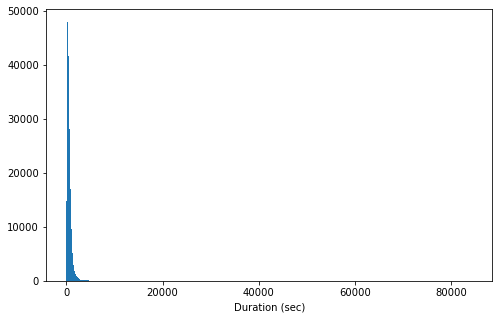

In [43]:
# start with a standard-scaled plot
binsize = 200
bins = np.arange(0, trips['duration_sec'].max(), binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = trips, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (sec)');

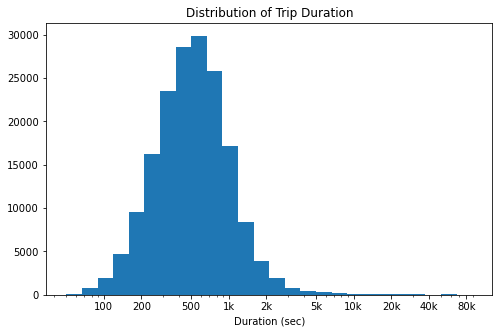

In [44]:
# there are high duration with very low frequency in the distribution, so let's put it on a log scale instead
log_binsize = 0.125
bins = 10 ** np.arange(1.7, np.log10(trips['duration_sec'].max())+log_binsize, log_binsize)
dur_val = [100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4]
dur_lab = [100, 200, 500, '1k', '2k', '5k', '10k', '20k', '40k','80k']
plt.figure(figsize=[8, 5])
plt.hist(data = trips, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(dur_val, dur_lab)
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show()

## Trip Frequency by Hours of the Day (Start time)

In the case of hour of the day, the highest number of rides were between 8am and 9am in the morning and also 5pm-6pm in the evening. Least rides were recorded at the early hours of the day

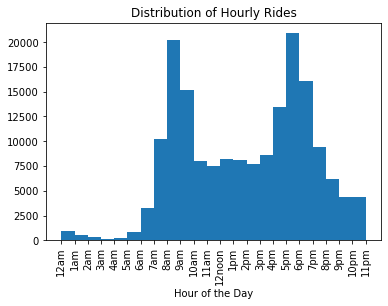

In [45]:
bins = np.arange(0, 24, 1)
a = []
for b in bins:
    if b == 0:
        a.append('12am')
    elif b<12:
        a.append(str(b)+'am')
    elif b==12:
        a.append('12noon')
    else:
        a.append(str(b-12) +'pm')
plt.hist(trips.start_time.dt.hour, bins=bins)
plt.xticks(bins, a)
plt.xticks(rotation=90)
plt.xlabel('Hour of the Day')
plt.title('Distribution of Hourly Rides');

## Frequency by days of the week

In the case of days of the week, the highest number of rides were on Thursday, followed by Tuesdays. Least number of rides were recorded on weekends

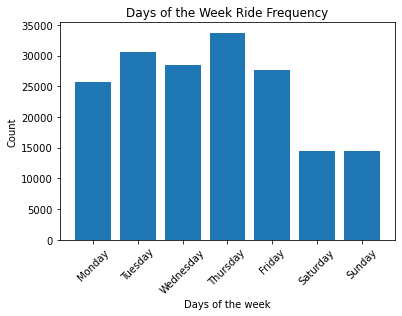

In [46]:
# ploting (days of the week) start_time
days = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_agg = trips.start_time.dt.isocalendar().day.value_counts().sort_values()
plt.bar(days_agg.index, days_agg)
plt.xticks([1,2,3,4,5,6,7],days)
plt.xticks(rotation=45);
plt.xlabel('Days of the week')
plt.ylabel('Count')
plt.title('Days of the Week Ride Frequency');

## Distribution for Gender, User Type and Bike Share

The number of trips made by subscribers is far greater than that made by customers. Also more men take bike rides than women and also few bike are shared for all trip.

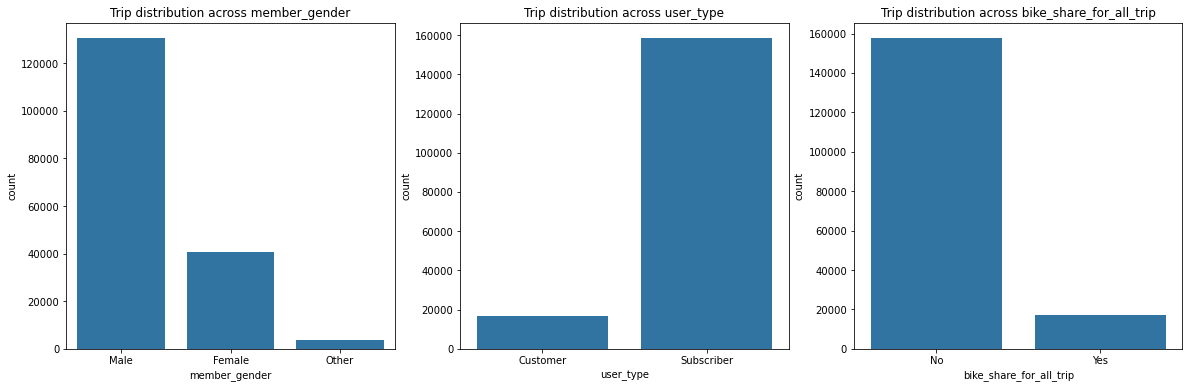

In [47]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(ncols=3, figsize = [20,6])
cat = ['member_gender','user_type', 'bike_share_for_all_trip']
c = 0
default_color = sb.color_palette()[0]
for var in cat:
    sb.countplot(data = trips, x = var, color = default_color, ax = ax[c])
    ax[c].set_title('Trip distribution across'+ " " +var)
    c=c+1
plt.show()

## Average Trip Duration by Category

The mean trip duration is highest among others, followed by Female and then Male. Customers have higher mean trip duration time compared with Subscribers.

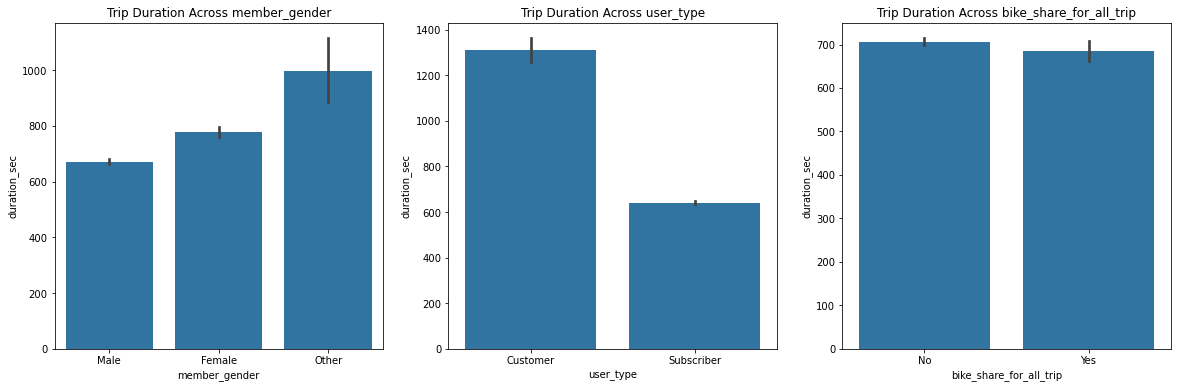

In [48]:
fig, ax = plt.subplots(ncols=3, figsize = [20,6])
cat = ['member_gender','user_type', 'bike_share_for_all_trip']
c = 0
default_color = sb.color_palette()[0]
for var in cat:
    sb.barplot(data = trips, x = var, y = "duration_sec", color = default_color, ax = ax[c])
    ax[c].set_title('Trip Duration Across'+ " " +var)
    c=c+1
plt.show()

## Average Trip Duration for each hour of the day

Though the distribution of duration for each hour appears to be uniform, the mean duration is greatest at 3am in the morning.

In [49]:
def mybarplot(df, xvar, yvar):
    # Set plot dimensions 
    fig = plt.figure(figsize = [15,7])
    # plot bar plot
    ax = sb.barplot(data = trips, x = xvar, y = yvar, color=sb.color_palette()[0])
    if len(xvar.unique()) == 24:
        plt.xticks(bins, a)
        plt.xticks(rotation=90)
        plt.xlabel('Hour of the Day'.title(), fontsize = 10, weight = 'bold')
        plt.ylabel('Mean Duration'.title(), fontsize = 10, weight = 'bold')
        plt.title('Mean Duration in Different Hours'.title(), fontsize = 14, weight = 'bold')
    elif len(xvar.unique()) == 7:
        plt.xticks([0,1,2,3,4,5,6], days)
        plt.xticks(rotation=45)
        plt.xlabel('Days of the Week'.title(), fontsize = 10, weight = 'bold')
        plt.ylabel('Mean Duration'.title(), fontsize = 10, weight = 'bold')
        plt.title('Mean Duration in Different Days'.title(), fontsize = 14, weight = 'bold')
    else:
        plt.xlabel('Days of the Month'.title(), fontsize = 10, weight = 'bold')
        plt.ylabel('Mean Duration'.title(), fontsize = 10, weight = 'bold')
        plt.title('Mean Duration in Different Days'.title(), fontsize = 14, weight = 'bold')
    plt.show();

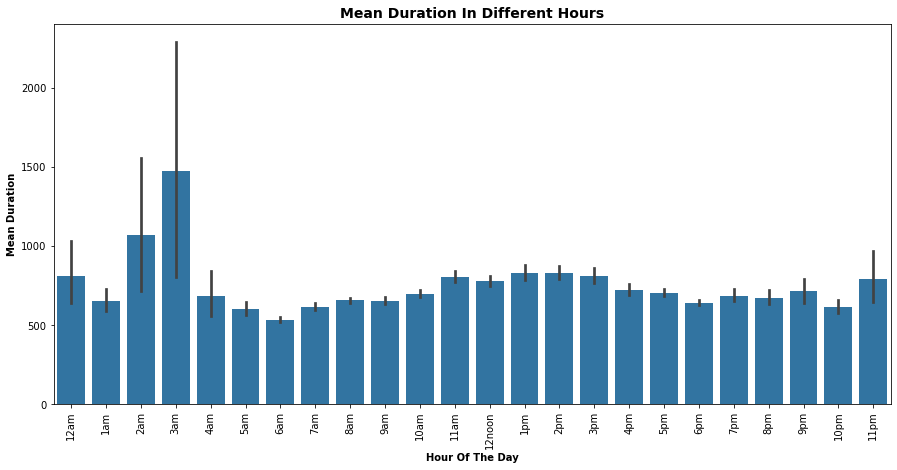

In [50]:
mybarplot(trips, trips.start_time.dt.hour, 'duration_sec')

## Average Trip Duration for each day of the week

Though the distribution of duration for the days appears to be uniform and the total number of ride is least at weekends, the mean duration is highest in the weekend.

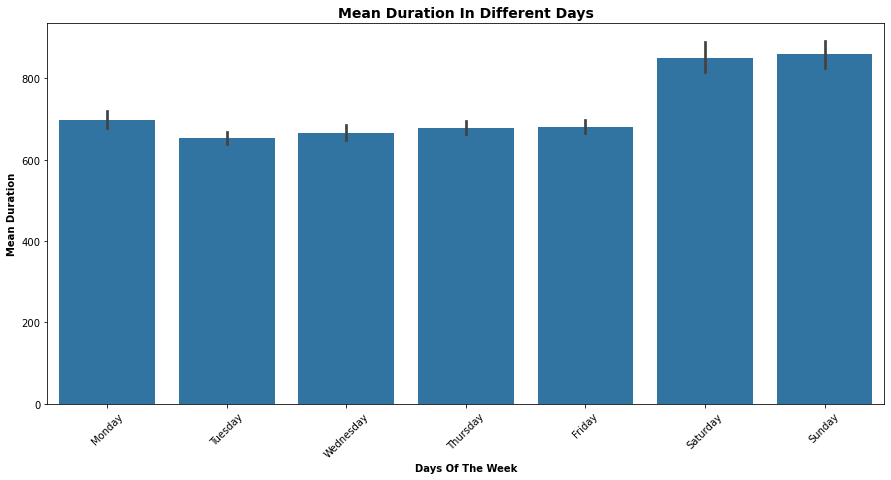

In [51]:
mybarplot(trips, trips.start_time.dt.isocalendar().day, 'duration_sec')

## ## User Categories vs Trip Fequency

For all days of the week, the number of male bike riders is highest followed by Female and others. Also, all days of the week sees higher number of subscribers than customers and higher number of riders that did not share their ride for all trip.

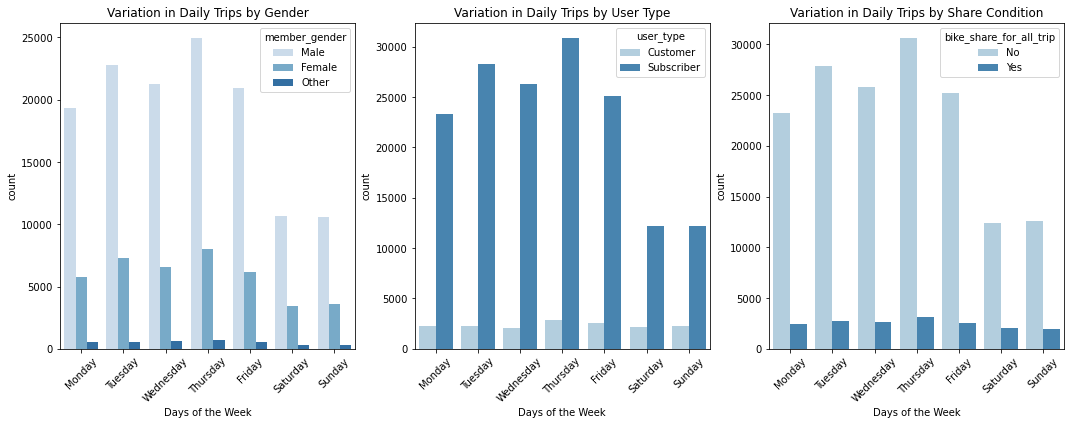

In [52]:
# since there's only three subplots to create, using the full data should be fine.
fig, ax = plt.subplots(ncols=3, figsize = [18,6])

sb.countplot(data = trips, x = trips.start_time.dt.isocalendar().day, hue = 'member_gender', palette = 'Blues', ax=ax[0])
ax[0].set_xticklabels(days, rotation =45)
ax[0].set_xlabel('Days of the Week')
ax[0].set_title('Variation in Daily Trips by Gender')

sb.countplot(data = trips, x = trips.start_time.dt.isocalendar().day, hue = 'user_type', palette = 'Blues', ax=ax[1])
ax[1].set_xticklabels(days, rotation=45)
ax[1].set_xlabel('Days of the Week')
ax[1].set_title('Variation in Daily Trips by User Type')

sb.countplot(data = trips, x = trips.start_time.dt.isocalendar().day, hue = 'bike_share_for_all_trip', palette = 'Blues', ax=ax[2])
ax[2].set_xticklabels(days, rotation=45)
ax[2].set_xlabel('Days of the Week')
ax[2].set_title('Variation in Daily Trips by Share Condition')

plt.show()

## Duration by User Type and Gender for Each Days of the Week

For the gender and member type categories, the mean duration is highest on weekends. For each days of the week, customers have the highest mean duration compared to subscribers and also riders that have their gender registered as "others" have the highest mean trip duration followed by female then male. 

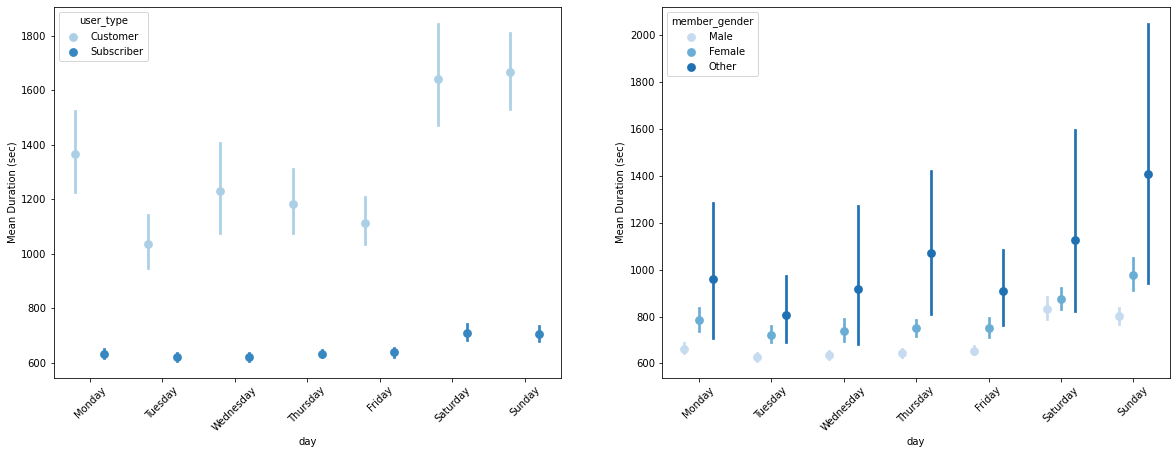

In [53]:
fig = plt.figure(figsize = [20,15])

plt.subplot(2,2,1)
ax = sb.pointplot(data = trips, x = trips.start_time.dt.isocalendar().day , y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks([0,1,2,3,4,5,6], days)
plt.xticks(rotation=45)
plt.ylabel('Mean Duration (sec)')

plt.subplot(2,2,2)
ax = sb.pointplot(data = trips, x = trips.start_time.dt.isocalendar().day , y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks([0,1,2,3,4,5,6], days)
plt.xticks(rotation=45)
plt.ylabel('Mean Duration (sec)');


In [54]:
!jupyter nbconvert Fordgobike_Explanatory_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Fordgobike_Explanatory_Analysis.ipynb to slides
[NbConvertApp] Writing 809391 bytes to Fordgobike_Explanatory_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(n